# Chapter 15. Processing Sequences Using RNNs and CNNs

RNNs in Focus: The chapter delves into recurrent neural networks (RNNs), a specialized neural network category capable of predicting future events, particularly in time series data.

Versatility in Sequence Analysis: RNNs excel in analyzing sequences of arbitrary lengths, proving valuable in applications ranging from stock market predictions to autonomous driving systems and natural language processing tasks.

Fundamentals and Training: The chapter covers fundamental concepts of RNNs and details their training using the backpropagation through time technique.

Challenges and Solutions: Addressing challenges faced by RNNs, the text discusses unstable gradients and proposes solutions such as recurrent dropout and layer normalization. It also tackles the issue of limited short-term memory, providing insights into extending it using LSTM and GRU cells.

Alternative Approaches for Sequential Data: While RNNs are suitable for sequential data, the text acknowledges that regular dense networks and convolutional neural networks (CNNs) can effectively handle small and long sequences, respectively.

Introduction to WaveNet: The chapter concludes by introducing the WaveNet, a CNN architecture specifically designed for sequences with tens of thousands of time steps.

Upcoming Exploration: The subsequent chapter promises further exploration of RNNs, emphasizing their applications in natural language processing. Additionally, newer architectures incorporating attention mechanisms will be discussed.

## Recurrent Neurons and Layers

Recurrent Neural Networks (RNNs) Overview:

* Feedforward vs. Recurrent Networks: The text contrasts feedforward neural networks with recurrent neural networks (RNNs), highlighting the latter's bidirectional connections.

* Basic Structure of an RNN: An introductory exploration of the simplest RNN structure, consisting of one neuron receiving inputs, producing an output, and feeding it back to itself.

* Time Unrolling: The concept of unrolling the recurrent neuron through time, illustrating its evolution at each time step.

* Layer of Recurrent Neurons: The extension to multiple neurons in a layer, emphasizing their connectivity to both input vectors and outputs from the previous time step.

Mathematics Behind RNNs:

* Weight Matrices and Output Calculation: Explanation of the weight matrices, W and W, and the mathematical formulation for computing the output of the entire recurrent layer.

* Mini-Batch Processing: Demonstrating the simultaneous computation of the recurrent layer's output for a whole mini-batch.

* Memory Cells: Introduction to the notion of memory cells within an RNN, highlighting their ability to retain information across time steps.

* Cell State and Output: Describing the relationship between a cell's state at a given time step and its output, with a glimpse into more complex cells capable of learning longer patterns.

Input-Output Sequences:

* Simultaneous Input and Output Sequences: The capability of an RNN to handle input and output sequences concurrently, with potential applications in predicting time series like stock prices.

* Different Sequence Architectures: An overview of various sequence architectures, including sequence-to-vector, vector-to-sequence, and Encoder-Decoder networks, each serving different purposes.

Training Challenges:

* Training a Recurrent Neural Network: The text concludes by posing the question of how to train an RNN, paving the way for further exploration in subsequent sections.

## Training RNNs

Training an RNN: Backpropagation Through Time (BPTT):

* Unrolling Through Time: The key strategy in training an RNN involves unrolling it through time, allowing for the application of regular backpropagation.

* Backpropagation Through Time (BPTT): The process begins with a forward pass through the unrolled network, followed by the evaluation of the output sequence using a cost function. This cost function may selectively consider outputs, for instance, in a sequence-to-vector RNN where only the last output matters. Gradients of the cost function are then propagated backward through the unrolled network.

* Model Parameter Update: The final step involves updating the model parameters using the gradients computed during BPTT. Importantly, the gradients flow backward through all relevant outputs used by the cost function, ensuring a comprehensive learning process.

* Implementation with tf.keras: The text mentions that the complexity of BPTT is managed by tf.keras, simplifying the coding process for practitioners.

* Readiness to Code: The section concludes by indicating the readiness to start coding, emphasizing the streamlined implementation facilitated by tf.keras.

**Understanding Time Series Data:**

- *Definition:* Time series data involves sequences of one or more values per time step, with univariate time series having a single value and multivariate time series having multiple values at each time step.

- *Common Tasks:* Predicting future values (forecasting) and imputing missing values from the past (imputation) are common tasks associated with time series data.

- *Data Generation Function:* The text introduces a function, `generate_time_series()`, creating synthetic time series data for illustration. The function produces univariate time series with two sine waves of random frequencies and phases, plus some noise.

- *Data Representation:* Time series input features are generally represented as 3D arrays of shape [batch size, time steps, dimensionality], where dimensionality is 1 for univariate and more for multivariate time series.

**Creating Training, Validation, and Test Sets:**

- *Data Splitting:* The generated time series data is split into training, validation, and test sets for model evaluation.

- *Baseline Metrics:* Before employing Recurrent Neural Networks (RNNs), baseline metrics are established. Naive forecasting, predicting the last value in each series, and a simple fully connected network are used for comparison.

**Implementing Simple RNN:**

- *Introduction to Simple RNN:* A basic RNN model is introduced with a single layer containing a single neuron.

- *Model Evaluation:* The simple RNN is evaluated, and its Mean Squared Error (MSE) is compared to baseline metrics.

**Deepening RNNs:**

- *Introduction to Deep RNN:* To enhance performance, multiple layers of cells are stacked, creating a deep RNN.

- *Implementation:* The text provides a simple implementation of a deep RNN using three SimpleRNN layers.

- *Model Evaluation:* The deep RNN is evaluated and outperforms the simple RNN and the fully connected network.

**Fine-Tuning Model Architecture:**

- *Optimizing Output Layer:* The text suggests replacing the output layer with a Dense layer for faster runtime and flexibility in choosing the output activation function.

- *Model Adjustment:* Return sequences parameter is adjusted for the second (now last) recurrent layer.

- *Training and Evaluation:* The modified model is trained and evaluated, demonstrating comparable performance.

**Forecasting Multiple Time Steps:**

- *Task Expansion:* The text introduces the idea of predicting multiple future values by changing the target appropriately.

- *Anticipating Multiple Values:* The question arises about predicting the next 10 values instead of just one, prompting further exploration in the text.


Also it is presented different approaches to time series forecasting using recurrent neural networks (RNNs) and related techniques. Here's a summarized overview:

Approach 1: One-Step Forecasting

Use a pre-trained RNN model to predict the next value in a time series.
Iterate this process by adding the predicted value to the inputs and predicting the next value.
Evaluation shows an MSE (Mean Squared Error) of about 0.029 on the validation set.
Approach 2: Multi-Step Forecasting with Sequence-to-Vector Model

Train an RNN to predict the next 10 values at once using a sequence-to-vector model.
The output layer has 10 units instead of 1.
This model performs well, with an MSE for the next 10 time steps of about 0.008.
Approach 3: Sequence-to-Sequence RNN

Train an RNN to predict the next 10 values at each time step, turning it into a sequence-to-sequence RNN.
Use TimeDistributed layer to apply the output Dense layer at every time step.
The model shows improved stability and speed during training, resulting in a validation MSE of about 0.006.
Dealing with Unstable Gradients

Use techniques like good parameter initialization, faster optimizers, dropout, and gradient clipping to address the unstable gradients problem in training RNNs.
Handling Short-Term Memory Problem

Introduce Long Short-Term Memory (LSTM) cells, which have proven effective in capturing long-term dependencies in data.
LSTM cells include forget, input, and output gates to control memory storage and retrieval.
Gated Recurrent Unit (GRU) Cells

An alternative to LSTM, GRU cells simplify the architecture by merging short-term and long-term states.
GRU includes a single gate controller for forget and input gates and lacks an output gate.
1D Convolutional Layers

Combine RNNs with 1D convolutional layers to process sequences.
Downsample input sequences to help RNNs capture longer patterns.
Use convolutional layers with appropriate padding and strides to adjust sequence lengths.
WaveNet Architecture

Introduce the WaveNet architecture, which stacks 1D convolutional layers with increasing dilation rates to efficiently capture short- and long-term patterns.
The architecture involves multiple blocks of convolutional layers with varying dilation rates.
The approaches discussed provide insights into improving the performance of RNNs for time series forecasting by addressing challenges such as unstable gradients and short-term memory limitations.

In [2]:
# SETUP:

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os
from pathlib import Path

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Basic RNNs


Generate the Dataset


In [3]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [4]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [5]:
X_train.shape, y_train.shape


((7000, 50, 1), (7000, 1))

Saving figure time_series_plot


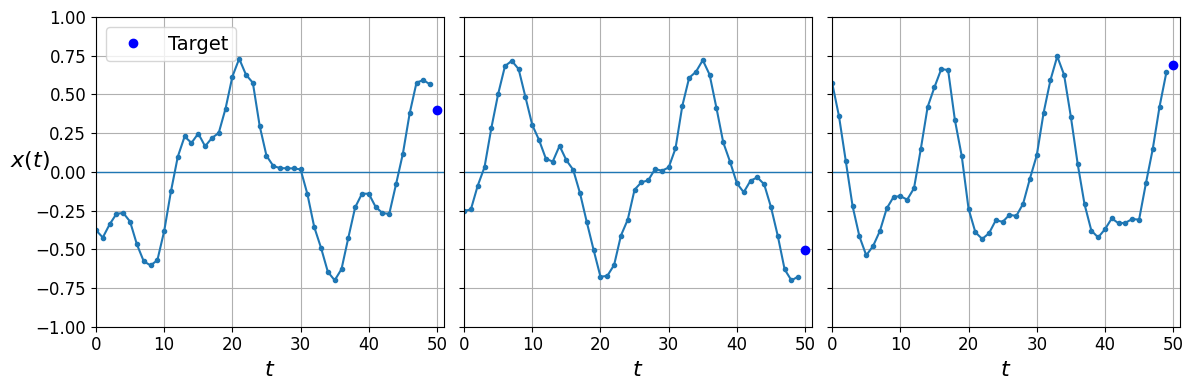

In [6]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
save_fig("time_series_plot")
plt.show()

# Computing Some Baselines


#### Naive predictions (just predict the last observed value):



In [7]:
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020211367

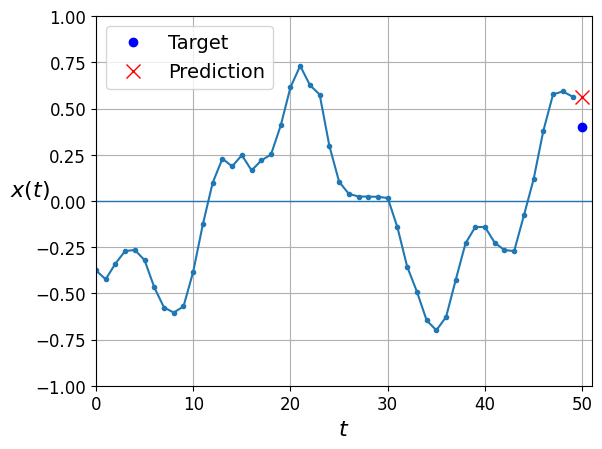

In [8]:
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 5s 12ms/step - loss: 0.1541 - val_loss: 0.0597
Epoch 2/10
219/219 [==============================] - 2s 7ms/step - loss: 0.0432 - val_loss: 0.0313
Epoch 3/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0250 - val_loss: 0.0198
Epoch 4/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0167 - val_loss: 0.0144
Epoch 5/10
219/219 [==============================] - 1s 6ms/step - loss: 0.0128 - val_loss: 0.0118
Epoch 6/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0107 - val_loss: 0.0104
Epoch 7/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 8/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0086 - val_loss: 0.0084
Epoch 9/10
219/219 [==============================] - 1s 6ms/step - loss: 0.0078 - val_loss: 0.0076
Epoch 10/10
219/219 [==============================] - 1s 6ms/step - loss: 0.0071 - val_loss: 0.007

In [10]:
model.evaluate(X_valid, y_valid)


63/63 [==============================] - 0s 2ms/step - loss: 0.0070


0.007030799984931946

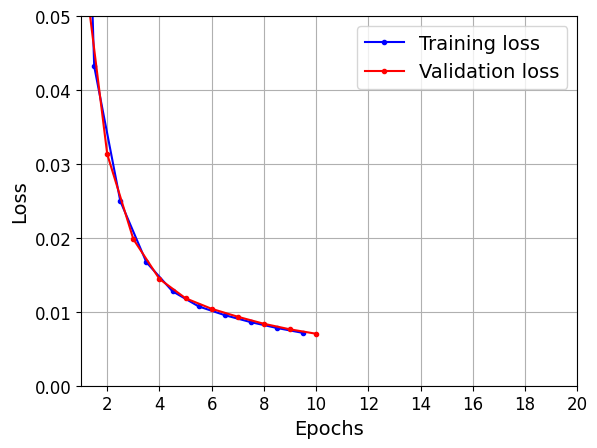

In [11]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

63/63 [==============================] - 0s 1ms/step


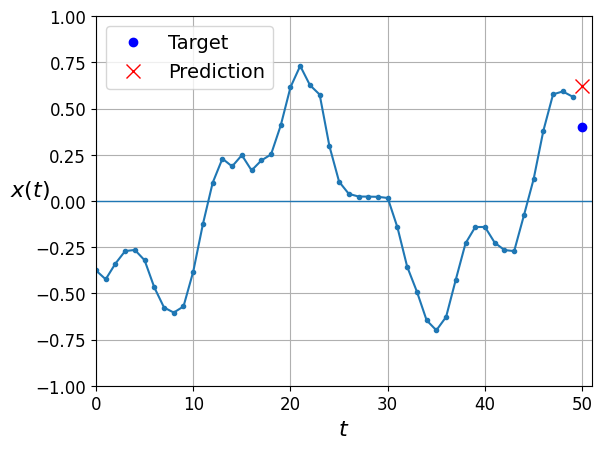

In [12]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

#### Using a Simple RNN


In [13]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 9s 36ms/step - loss: 0.0150 - val_loss: 0.0109
Epoch 2/10
219/219 [==============================] - 6s 29ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 3/10
219/219 [==============================] - 14s 65ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 4/10
219/219 [==============================] - 14s 64ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 5/10
219/219 [==============================] - 11s 49ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 6/10
219/219 [==============================] - 10s 47ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 7/10
219/219 [==============================] - 7s 33ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 8/10
219/219 [==============================] - 13s 58ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 9/10
219/219 [==============================] - 11s 50ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 10/10
219/219 [==============================] - 8s 35ms/step - loss: 0.0114 - 

In [14]:
model.evaluate(X_valid, y_valid)


63/63 [==============================] - 0s 7ms/step - loss: 0.0110


0.010979429818689823

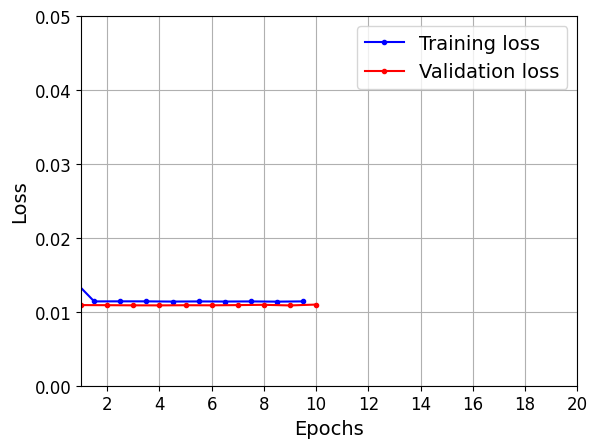

In [15]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

63/63 [==============================] - 1s 7ms/step


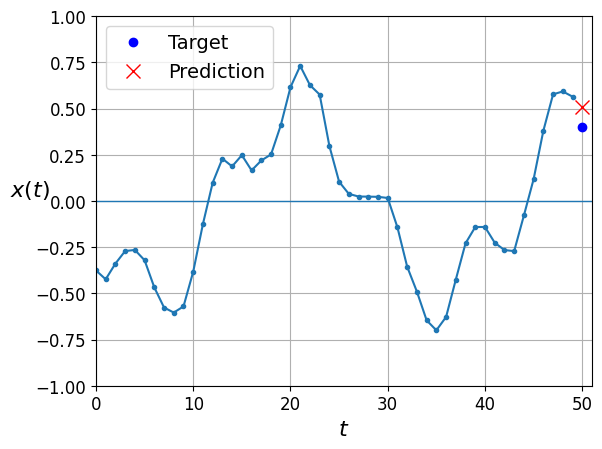

In [16]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

### Deep RNNs


In [17]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 44s 183ms/step - loss: 0.0102 - val_loss: 0.0039
Epoch 2/20
219/219 [==============================] - 40s 181ms/step - loss: 0.0036 - val_loss: 0.0030
Epoch 3/20
219/219 [==============================] - 40s 181ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 4/20
219/219 [==============================] - 28s 129ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 5/20
219/219 [==============================] - 29s 131ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 6/20
219/219 [==============================] - 31s 139ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 7/20
219/219 [==============================] - 28s 129ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 8/20
219/219 [==============================] - 28s 129ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 9/20
219/219 [==============================] - 28s 128ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 10/20
219/219 [==============================] - 28s 128ms/step - l

In [18]:
model.evaluate(X_valid, y_valid)


63/63 [==============================] - 1s 14ms/step - loss: 0.0025


0.002494117245078087

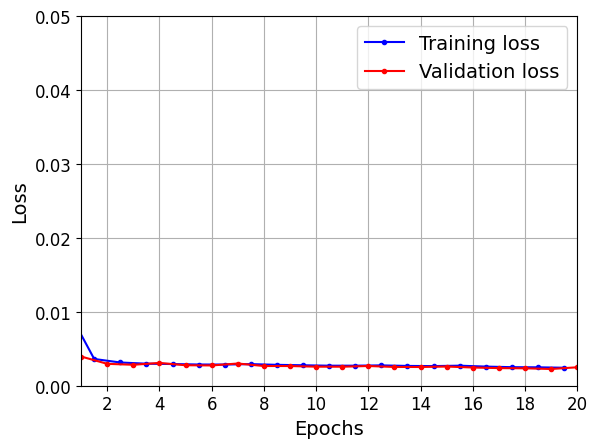

In [19]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

63/63 [==============================] - 1s 14ms/step


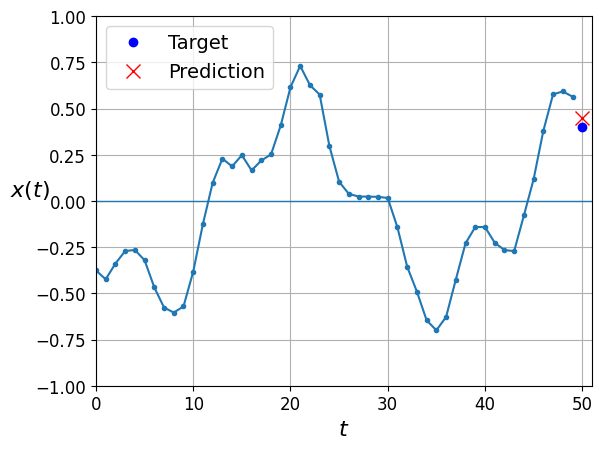

In [20]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [21]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 22s 92ms/step - loss: 0.0068 - val_loss: 0.0034
Epoch 2/10
219/219 [==============================] - 18s 83ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 3/10
219/219 [==============================] - 20s 90ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 4/10
219/219 [==============================] - 18s 83ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 5/10
219/219 [==============================] - 19s 86ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 6/10
219/219 [==============================] - 19s 88ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 7/10
219/219 [==============================] - 18s 83ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 8/10
219/219 [==============================] - 20s 90ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 9/10
219/219 [==============================] - 18s 84ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 10/10
219/219 [==============================] - 20s 90ms/step - loss: 0.002

In [22]:
model.evaluate(X_valid, y_valid)


63/63 [==============================] - 1s 10ms/step - loss: 0.0026


0.0026249769143760204

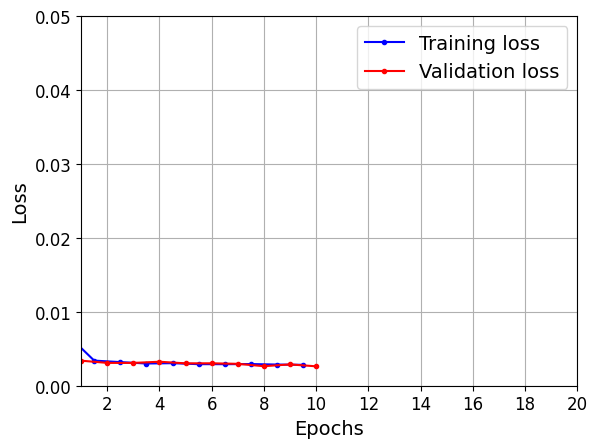

In [23]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

63/63 [==============================] - 1s 9ms/step


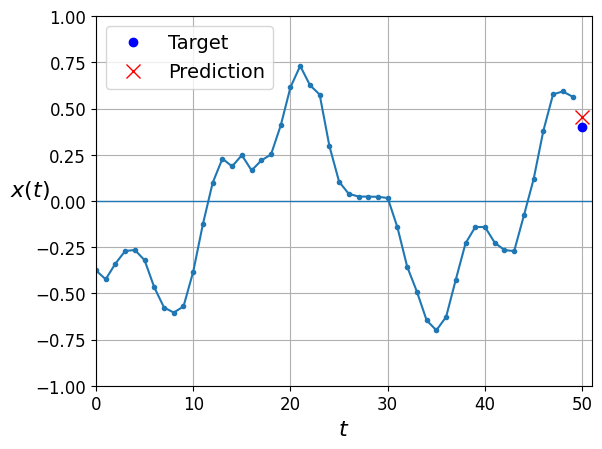

In [24]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

### Forecasting Several Steps Ahead

In [25]:
np.random.seed(43) # not 42, as it would give the first series in the train set

series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]


1/1 [==============================] - 0s 33ms/step


In [26]:
Y_pred.shape


(1, 10, 1)

Saving figure forecast_ahead_plot


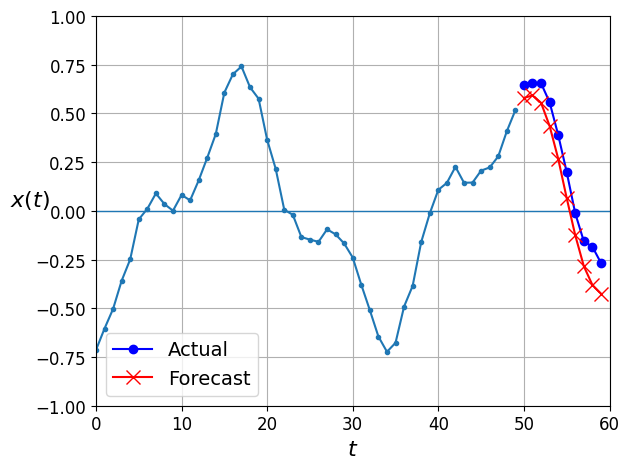

In [27]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bo-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "rx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)
save_fig("forecast_ahead_plot")
plt.show()

In [28]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [29]:
X = X_valid
for step_ahead in range(10):
    y_pred_one = model.predict(X)[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:, 0]

63/63 [==============================] - 1s 11ms/step


In [30]:
Y_pred.shape


(2000, 10)

In [31]:
np.mean(keras.metrics.mean_squared_error(Y_valid, Y_pred))


0.02463916

In [32]:
Y_naive_pred = np.tile(X_valid[:, -1], 10) # take the last time step value, and repeat it 10 times
np.mean(keras.metrics.mean_squared_error(Y_valid, Y_naive_pred))

0.25697407

In [33]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1754 - val_loss: 0.0741
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0573 - val_loss: 0.0475
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0419 - val_loss: 0.0378
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0353 - val_loss: 0.0331
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0316 - val_loss: 0.0301
Epoch 6/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0290 - val_loss: 0.0282
Epoch 7/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0272 - val_loss: 0.0265
Epoch 8/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0258 - val_loss: 0.0251
Epoch 9/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0247 - val_loss: 0.0242
Epoch 10/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0237 - val_loss: 0.0233

In [34]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 22s 92ms/step - loss: 0.0582 - val_loss: 0.0359
Epoch 2/20
219/219 [==============================] - 18s 84ms/step - loss: 0.0310 - val_loss: 0.0242
Epoch 3/20
219/219 [==============================] - 20s 92ms/step - loss: 0.0216 - val_loss: 0.0176
Epoch 4/20
219/219 [==============================] - 18s 83ms/step - loss: 0.0167 - val_loss: 0.0176
Epoch 5/20
219/219 [==============================] - 19s 87ms/step - loss: 0.0140 - val_loss: 0.0127
Epoch 6/20
219/219 [==============================] - 19s 88ms/step - loss: 0.0130 - val_loss: 0.0118
Epoch 7/20
219/219 [==============================] - 18s 84ms/step - loss: 0.0124 - val_loss: 0.0116
Epoch 8/20
219/219 [==============================] - 20s 91ms/step - loss: 0.0116 - val_loss: 0.0109
Epoch 9/20
219/219 [==============================] - 18s 84ms/step - loss: 0.0113 - val_loss: 0.0129
Epoch 10/20
219/219 [==============================] - 20s 92ms/step - loss: 0.011

In [35]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

1/1 [==============================] - 0s 223ms/step


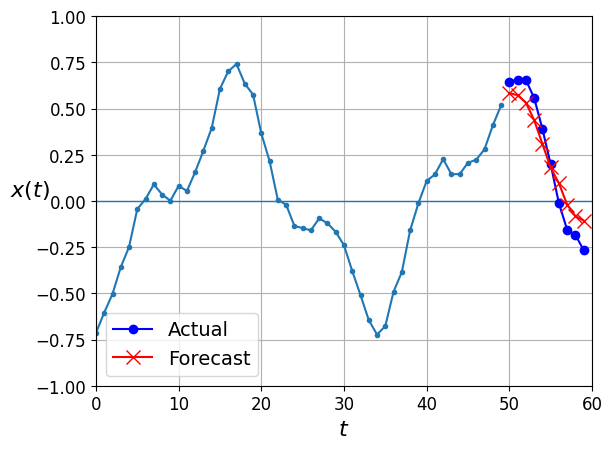

In [36]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [37]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [38]:
X_train.shape, Y_train.shape


((7000, 50, 1), (7000, 50, 10))

In [39]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 22s 91ms/step - loss: 0.0505 - last_time_step_mse: 0.0388 - val_loss: 0.0386 - val_last_time_step_mse: 0.0265
Epoch 2/20
219/219 [==============================] - 18s 83ms/step - loss: 0.0374 - last_time_step_mse: 0.0248 - val_loss: 0.0375 - val_last_time_step_mse: 0.0275
Epoch 3/20
219/219 [==============================] - 20s 90ms/step - loss: 0.0322 - last_time_step_mse: 0.0198 - val_loss: 0.0352 - val_last_time_step_mse: 0.0248
Epoch 4/20
219/219 [==============================] - 18s 83ms/step - loss: 0.0290 - last_time_step_mse: 0.0168 - val_loss: 0.0259 - val_last_time_step_mse: 0.0130
Epoch 5/20
219/219 [==============================] - 20s 90ms/step - loss: 0.0261 - last_time_step_mse: 0.0139 - val_loss: 0.0238 - val_last_time_step_mse: 0.0108
Epoch 6/20
219/219 [==============================] - 18s 82ms/step - loss: 0.0240 - last_time_step_mse: 0.0116 - val_loss: 0.0231 - val_last_time_step_mse: 0.0104
Epoch 7/20
219/2

In [40]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

1/1 [==============================] - 0s 214ms/step


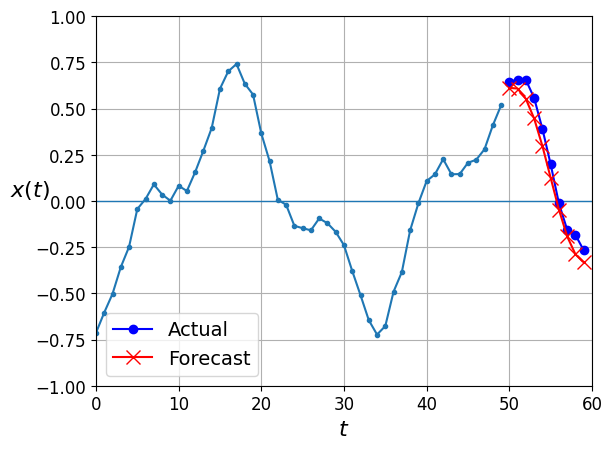

In [41]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

#### Deep RNN with Batch Norm


In [42]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.BatchNormalization(),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 24s 94ms/step - loss: 0.2377 - last_time_step_mse: 0.2265 - val_loss: 0.0716 - val_last_time_step_mse: 0.0651
Epoch 2/20
219/219 [==============================] - 18s 85ms/step - loss: 0.0573 - last_time_step_mse: 0.0475 - val_loss: 0.0554 - val_last_time_step_mse: 0.0464
Epoch 3/20
219/219 [==============================] - 20s 93ms/step - loss: 0.0498 - last_time_step_mse: 0.0400 - val_loss: 0.0476 - val_last_time_step_mse: 0.0376
Epoch 4/20
219/219 [==============================] - 18s 84ms/step - loss: 0.0456 - last_time_step_mse: 0.0355 - val_loss: 0.0435 - val_last_time_step_mse: 0.0327
Epoch 5/20
219/219 [==============================] - 20s 91ms/step - loss: 0.0422 - last_time_step_mse: 0.0318 - val_loss: 0.0413 - val_last_time_step_mse: 0.0306
Epoch 6/20
219/219 [==============================] - 19s 85ms/step - loss: 0.0396 - last_time_step_mse: 0.0289 - val_loss: 0.0385 - val_last_time_step_mse: 0.0269
Epoch 7/20
219/2

### Deep RNNs with Layer Norm


In [43]:
from tensorflow.keras.layers import LayerNormalization


In [44]:
class LNSimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units,
                                                          activation=None)
        self.layer_norm = LayerNormalization()
        self.activation = keras.activations.get(activation)
    def get_initial_state(self, inputs=None, batch_size=None, dtype=None):
        if inputs is not None:
            batch_size = tf.shape(inputs)[0]
            dtype = inputs.dtype
        return [tf.zeros([batch_size, self.state_size], dtype=dtype)]
    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

In [45]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True,
                     input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 44s 178ms/step - loss: 0.1257 - last_time_step_mse: 0.1133 - val_loss: 0.0623 - val_last_time_step_mse: 0.0531
Epoch 2/20
219/219 [==============================] - 37s 169ms/step - loss: 0.0579 - last_time_step_mse: 0.0493 - val_loss: 0.0539 - val_last_time_step_mse: 0.0440
Epoch 3/20
219/219 [==============================] - 37s 169ms/step - loss: 0.0506 - last_time_step_mse: 0.0399 - val_loss: 0.0465 - val_last_time_step_mse: 0.0335
Epoch 4/20
219/219 [==============================] - 38s 175ms/step - loss: 0.0445 - last_time_step_mse: 0.0314 - val_loss: 0.0415 - val_last_time_step_mse: 0.0276
Epoch 5/20
219/219 [==============================] - 38s 176ms/step - loss: 0.0400 - last_time_step_mse: 0.0261 - val_loss: 0.0374 - val_last_time_step_mse: 0.0230
Epoch 6/20
219/219 [==============================] - 39s 178ms/step - loss: 0.0368 - last_time_step_mse: 0.0226 - val_loss: 0.0353 - val_last_time_step_mse: 0.0210
Epoch 7/20

#### Creating a Custom RNN Class


In [46]:
class MyRNN(keras.layers.Layer):
    def __init__(self, cell, return_sequences=False, **kwargs):
        super().__init__(**kwargs)
        self.cell = cell
        self.return_sequences = return_sequences
        self.get_initial_state = getattr(
            self.cell, "get_initial_state", self.fallback_initial_state)
    def fallback_initial_state(self, inputs):
        batch_size = tf.shape(inputs)[0]
        return [tf.zeros([batch_size, self.cell.state_size], dtype=inputs.dtype)]
    @tf.function
    def call(self, inputs):
        states = self.get_initial_state(inputs)
        shape = tf.shape(inputs)
        batch_size = shape[0]
        n_steps = shape[1]
        sequences = tf.TensorArray(
            inputs.dtype, size=(n_steps if self.return_sequences else 0))
        outputs = tf.zeros(shape=[batch_size, self.cell.output_size], dtype=inputs.dtype)
        for step in tf.range(n_steps):
            outputs, states = self.cell(inputs[:, step], states)
            if self.return_sequences:
                sequences = sequences.write(step, outputs)
        if self.return_sequences:
            return tf.transpose(sequences.stack(), [1, 0, 2])
        else:
            return outputs

In [47]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    MyRNN(LNSimpleRNNCell(20), return_sequences=True,
          input_shape=[None, 1]),
    MyRNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=10,
                    validation_data=(X_valid, Y_valid))

Epoch 1/10
219/219 [==============================] - 48s 203ms/step - loss: 0.1270 - accuracy: 0.3341 - val_loss: 0.0596 - val_accuracy: 0.4292
Epoch 2/10
219/219 [==============================] - 42s 190ms/step - loss: 0.0545 - accuracy: 0.4518 - val_loss: 0.0509 - val_accuracy: 0.4608
Epoch 3/10
219/219 [==============================] - 42s 192ms/step - loss: 0.0485 - accuracy: 0.4698 - val_loss: 0.0464 - val_accuracy: 0.4700
Epoch 4/10
219/219 [==============================] - 44s 199ms/step - loss: 0.0449 - accuracy: 0.4815 - val_loss: 0.0429 - val_accuracy: 0.4780
Epoch 5/10
219/219 [==============================] - 42s 191ms/step - loss: 0.0413 - accuracy: 0.4912 - val_loss: 0.0404 - val_accuracy: 0.4941
Epoch 6/10
219/219 [==============================] - 42s 192ms/step - loss: 0.0384 - accuracy: 0.4989 - val_loss: 0.0365 - val_accuracy: 0.4973
Epoch 7/10
219/219 [==============================] - 44s 200ms/step - loss: 0.0354 - accuracy: 0.5091 - val_loss: 0.0343 - val_ac

#### LSTMs

In [48]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 6s 13ms/step - loss: 0.0775 - accuracy: 0.3554 - val_loss: 0.0551 - val_accuracy: 0.4783
Epoch 2/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0472 - accuracy: 0.5058 - val_loss: 0.0411 - val_accuracy: 0.5205
Epoch 3/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0379 - accuracy: 0.5341 - val_loss: 0.0357 - val_accuracy: 0.5517
Epoch 4/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0341 - accuracy: 0.5557 - val_loss: 0.0329 - val_accuracy: 0.5593
Epoch 5/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0321 - accuracy: 0.5611 - val_loss: 0.0314 - val_accuracy: 0.5596
Epoch 6/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0307 - accuracy: 0.5639 - val_loss: 0.0300 - val_accuracy: 0.5671
Epoch 7/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0296 - accuracy: 0.5659 - val_loss: 0.0288 - val_accuracy: 0.5667
Ep

In [49]:
model.evaluate(X_valid, Y_valid)


63/63 [==============================] - 0s 6ms/step - loss: 0.0235 - accuracy: 0.5922


[0.02352668158710003, 0.592170000076294]

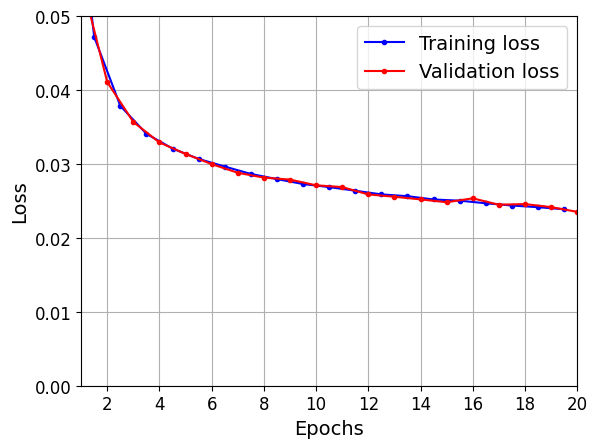

In [50]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [51]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

1/1 [==============================] - 1s 801ms/step


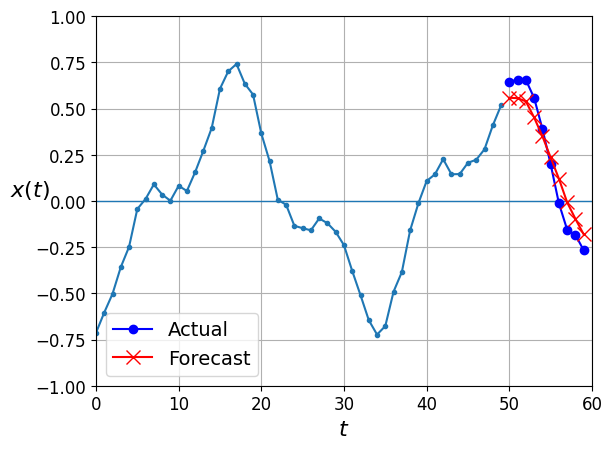

In [52]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

### GRUs


In [53]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 7s 12ms/step - loss: 0.0733 - last_time_step_mse: 0.0644 - val_loss: 0.0535 - val_last_time_step_mse: 0.0425
Epoch 2/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0483 - last_time_step_mse: 0.0375 - val_loss: 0.0449 - val_last_time_step_mse: 0.0336
Epoch 3/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0430 - last_time_step_mse: 0.0316 - val_loss: 0.0409 - val_last_time_step_mse: 0.0296
Epoch 4/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0386 - last_time_step_mse: 0.0266 - val_loss: 0.0355 - val_last_time_step_mse: 0.0221
Epoch 5/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0337 - last_time_step_mse: 0.0205 - val_loss: 0.0328 - val_last_time_step_mse: 0.0193
Epoch 6/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0306 - last_time_step_mse: 0.0159 - val_loss: 0.0293 - val_last_time_step_mse: 0.0140
Epoch 7/20
219/219 [=====

In [54]:
model.evaluate(X_valid, Y_valid)


63/63 [==============================] - 0s 4ms/step - loss: 0.0231 - last_time_step_mse: 0.0085


[0.023137172684073448, 0.00850217416882515]

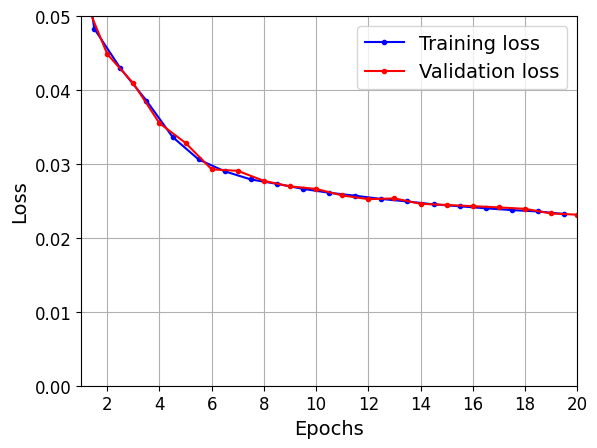

In [55]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [56]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

1/1 [==============================] - 1s 663ms/step


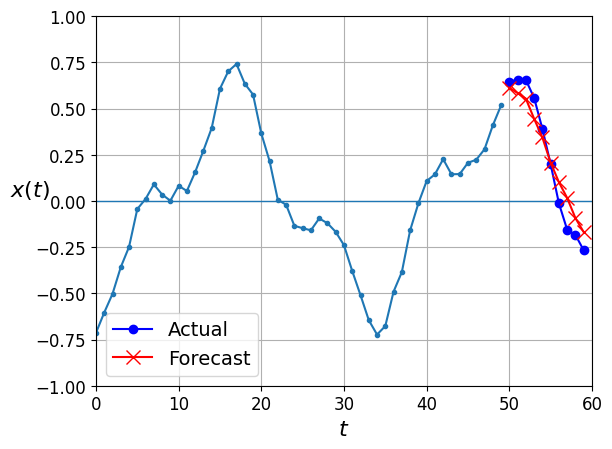

In [57]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

### Using One-Dimensional Convolutional Layers to Process Sequences


In [58]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid",
                        input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train[:, 3::2], epochs=20,
                    validation_data=(X_valid, Y_valid[:, 3::2]))

Epoch 1/20
219/219 [==============================] - 7s 11ms/step - loss: 0.0713 - last_time_step_mse: 0.0642 - val_loss: 0.0473 - val_last_time_step_mse: 0.0384
Epoch 2/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0408 - last_time_step_mse: 0.0330 - val_loss: 0.0361 - val_last_time_step_mse: 0.0276
Epoch 3/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0333 - last_time_step_mse: 0.0254 - val_loss: 0.0305 - val_last_time_step_mse: 0.0227
Epoch 4/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0287 - last_time_step_mse: 0.0201 - val_loss: 0.0270 - val_last_time_step_mse: 0.0181
Epoch 5/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0261 - last_time_step_mse: 0.0168 - val_loss: 0.0251 - val_last_time_step_mse: 0.0157
Epoch 6/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0241 - last_time_step_mse: 0.0139 - val_loss: 0.0234 - val_last_time_step_mse: 0.0131
Epoch 7/20
219/219 [======

### WaveNet


In [59]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8) * 2:
    model.add(keras.layers.Conv1D(filters=20, kernel_size=2, padding="causal",
                                  activation="relu", dilation_rate=rate))
model.add(keras.layers.Conv1D(filters=10, kernel_size=1))
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 7s 12ms/step - loss: 0.0684 - last_time_step_mse: 0.0560 - val_loss: 0.0366 - val_last_time_step_mse: 0.0224
Epoch 2/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0326 - last_time_step_mse: 0.0197 - val_loss: 0.0298 - val_last_time_step_mse: 0.0170
Epoch 3/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0287 - last_time_step_mse: 0.0162 - val_loss: 0.0273 - val_last_time_step_mse: 0.0144
Epoch 4/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0267 - last_time_step_mse: 0.0143 - val_loss: 0.0261 - val_last_time_step_mse: 0.0138
Epoch 5/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0255 - last_time_step_mse: 0.0131 - val_loss: 0.0247 - val_last_time_step_mse: 0.0123
Epoch 6/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0245 - last_time_step_mse: 0.0121 - val_loss: 0.0238 - val_last_time_step_mse: 0.0112
Epoch 7/20
219/219 [======

In [60]:
class GatedActivationUnit(keras.layers.Layer):
    def __init__(self, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
    def call(self, inputs):
        n_filters = inputs.shape[-1] // 2
        linear_output = self.activation(inputs[..., :n_filters])
        gate = keras.activations.sigmoid(inputs[..., n_filters:])
        return self.activation(linear_output) * gate

In [61]:
def wavenet_residual_block(inputs, n_filters, dilation_rate):
    z = keras.layers.Conv1D(2 * n_filters, kernel_size=2, padding="causal",
                            dilation_rate=dilation_rate)(inputs)
    z = GatedActivationUnit()(z)
    z = keras.layers.Conv1D(n_filters, kernel_size=1)(z)
    return keras.layers.Add()([z, inputs]), z

In [62]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

n_layers_per_block = 3 # 10 in the paper
n_blocks = 1 # 3 in the paper
n_filters = 32 # 128 in the paper
n_outputs = 10 # 256 in the paper

inputs = keras.layers.Input(shape=[None, 1])
z = keras.layers.Conv1D(n_filters, kernel_size=2, padding="causal")(inputs)
skip_to_last = []
for dilation_rate in [2**i for i in range(n_layers_per_block)] * n_blocks:
    z, skip = wavenet_residual_block(z, n_filters, dilation_rate)
    skip_to_last.append(skip)
z = keras.activations.relu(keras.layers.Add()(skip_to_last))
z = keras.layers.Conv1D(n_filters, kernel_size=1, activation="relu")(z)
Y_proba = keras.layers.Conv1D(n_outputs, kernel_size=1, activation="softmax")(z)

model = keras.models.Model(inputs=[inputs], outputs=[Y_proba])

In [63]:
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=2,
                    validation_data=(X_valid, Y_valid))

Epoch 1/2
219/219 [==============================] - 7s 15ms/step - loss: 0.1295 - last_time_step_mse: 0.1254 - val_loss: 0.1227 - val_last_time_step_mse: 0.1197
Epoch 2/2
219/219 [==============================] - 2s 8ms/step - loss: 0.1221 - last_time_step_mse: 0.1177 - val_loss: 0.1217 - val_last_time_step_mse: 0.1188
